## Example script | PyFrag Plotter
This notebook acts as an example of how to use the "pyfrag_plotter" package to plot the results of a PyFrag calculation.

### Prequirements:
- Installation of the "pyfrag_plotter" package (e.g. `python -m pip install pyfrag_plotter`)

### Requirements for running the script: 
- Directory containing the relevant PyFrag files, being the inputfile (.in) and the outputfile (pyfrag_*.txt)

### Flow of the program:
- Initialize the config file
- Load the PyFrag output file and input file. This will create a dataframe that contains all the information from the PyFrag output file, and a dictionary that contains all the information from the PyFrag input file.
- Process the dataframe by trimming data, removing dispersion key, removing outliers and more
- Make a PyFragResults object that combines the specifications in the PyFrag input file with the unclear header keys (such as overlap_1) in processed dataframe

From here, you can choose to plot or to interpolate. The plotting function will plot the results of the PyFrag calculation, and the interpolation function will interpolate at a specified point of on the chosen IRC coordinate. The interpolation function is not yet implemented.

## Start the program!

First, Initialize the config file. In this file, you can specify plot settings, such as the font, font size, figure size, etc, but also which eda keys to plot, and until which energy value (dEint) to plot.

If you have a specific config file you want to use, you can provide it as an argument to the initialize_pyfrag_plotter function. If you don't provide a config file, the default config file will be used that is part of the package.

In [7]:
# Load the modules
import os
from pyfrag_plotter.config_handler import initialize_pyfrag_plotter
from pyfrag_plotter.pyfrag_object import create_pyfrag_object_from_dir
from pyfrag_plotter.plot.plotter import Plotter

Now it is time to load the PyFrag output file and input file. This will create a dataframe that contains all the information from the PyFrag output file, and a dictionary that contains all the information from the PyFrag input file.

In [8]:
# First, initialize the config file
initialize_pyfrag_plotter()

# Next, specify the path to the pyfrag output directory and read in the input file and the output file
base_results_path = "/Users/siebeld/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/PhD/Projects/Squaramides/pyfrag_results"
# base_results_path = r"C:\Users\siebb\VU_PhD\PhD\Projects\Squaramides\pyfrag_results"

plot_dir = "/Users/siebeld/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/PhD/Projects/Squaramides/Plots"
# plot_dir = r"C:\Users\siebb\VU_PhD\PhD\Projects\Squaramides\Plots"

# irc_coord = ("bondlength_1", "r - r$_{eq}$ / Å")
# irc_coord = ("bondlength_2", "r$_{cm}$ / Å")
# irc_coord = ("bondlength_3", "$\Delta$r$_{X \cdot\cdot\cdot H}$ / Å")
irc_coord = ("bondlength_4", "r$_{X \cdot\cdot\cdot H}$ / Å")   # type: ignore # noqa: W605 since it is a LaTeX string

result_dirs = ["ureas_di_O_Cs_all"]
pyfrag_dirs = [os.path.join(base_results_path, directory) for directory in result_dirs]

objs = [create_pyfrag_object_from_dir(pyfrag_dir) for pyfrag_dir in pyfrag_dirs]


trim_key EnergyTotal is not valid. Valid options are bondlength_x, angle_x, and dihedral_x. Proceeding with bondlength_1.


Since the input file(s) and output file(s) are loaded, we can process them and make a PyFragResults object. This object combines the specifications in the PyFrag input file with the unclear header keys (such as overlap_1) in processed dataframe.

Now let's do some plotting! Make an instance of the MultiPlotter by providing the directory in which the data is stored and the name of the corresponding output folder. Also, provide the PyFragResultsObjects and the irc coordinate on which the data should be plotted. The Multiplotter is able to plot ASM, EDA and ASM extra strain curves. You can even provide the keys that should be plotted, such as "EnergyTotal" or "Int" (they should match the keys in the pyfrag_*.txt resultsfile).

INFO:root:Plot function plot_asm called. Execution time: 1.19 seconds.


ValueError: range() arg 3 must not be zero

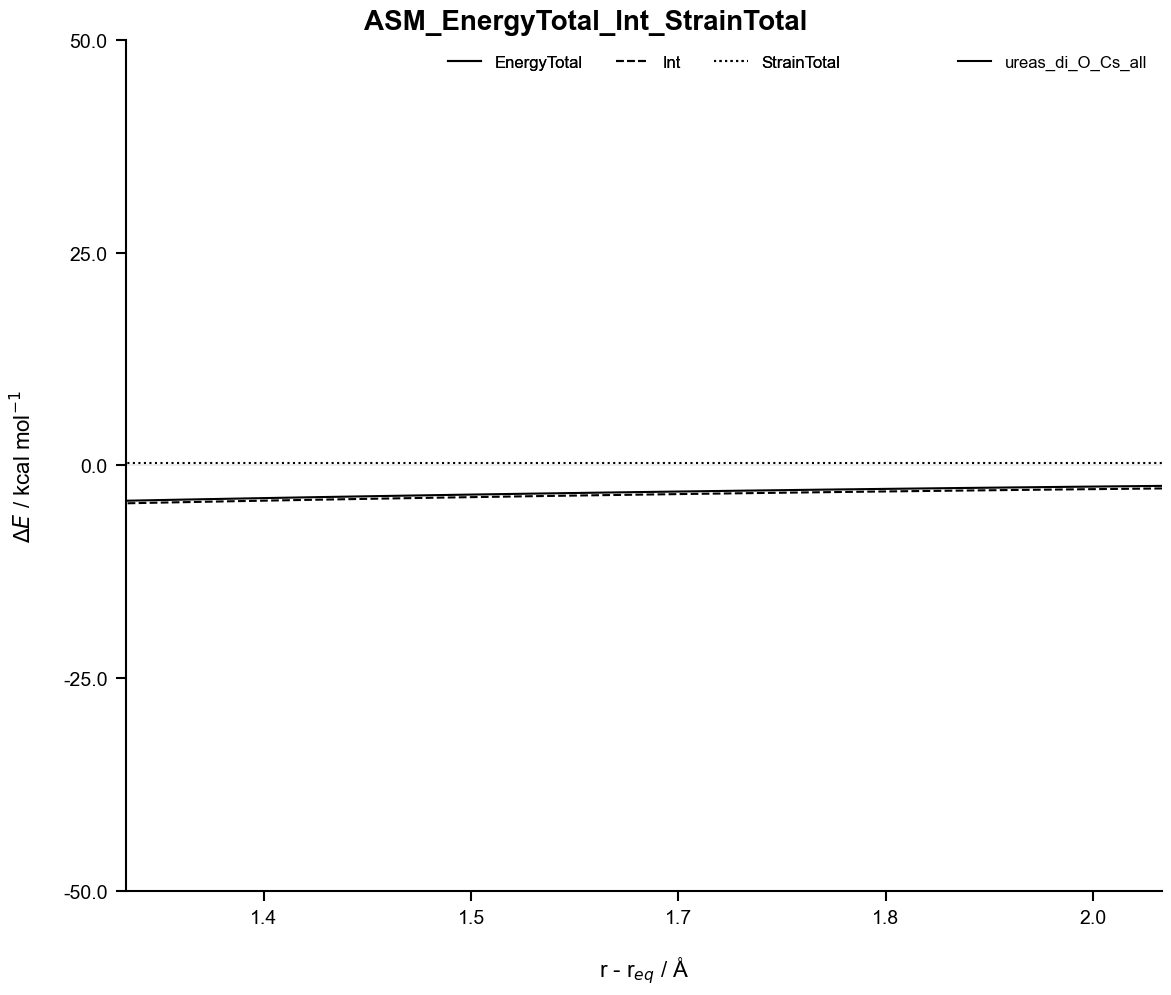

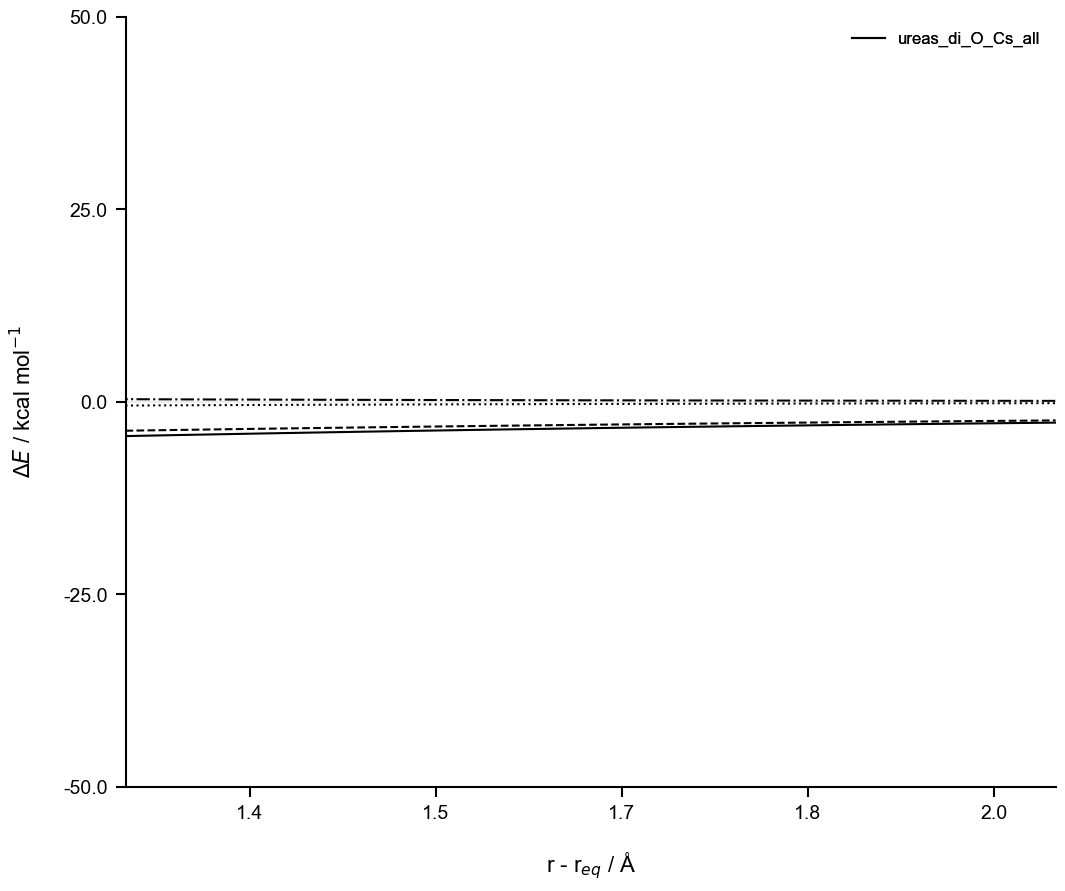

In [9]:
plot_dir = "/Users/siebeld/Desktop"
plot_inst = Plotter("plot_all_O_tri_ureas", plot_dir, objs, ("bondlength_1",  "r - r$_{eq}$ / Å"))
plot_inst.plot_asm()  # ["EnergyTotal"]
plot_inst.plot_eda()
plot_inst.plot_extra_strain()

You can also plot overlaps, populations and orbital energies in combinations you desire! Just pass the desired quantities as a list to the plot function. For example, if you want to plot the overlap and the populations, you can do it as follows: